# Implementation of Coursera Machine Learning ex 1 

In [2]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline  
from mpl_toolkits import mplot3d 

# from sklearn.cross_validation import train_test_split - deprecated
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize



/Users/marilenedacosta/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## uploading data for part 1 - linear regression with one variable

In [3]:
df = pd.read_csv('ex1/ex1data1.txt', names = ["pop", "profit"])
print(df.shape)

(97, 2)


In [4]:
# showing first 10 data points
df.head()

,pop,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


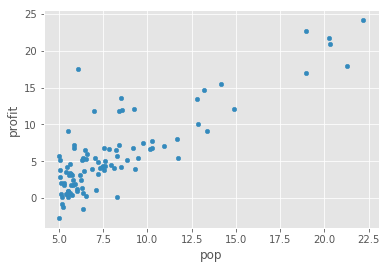

In [5]:
# plotting the data
df.plot.scatter(x="pop", y="profit")

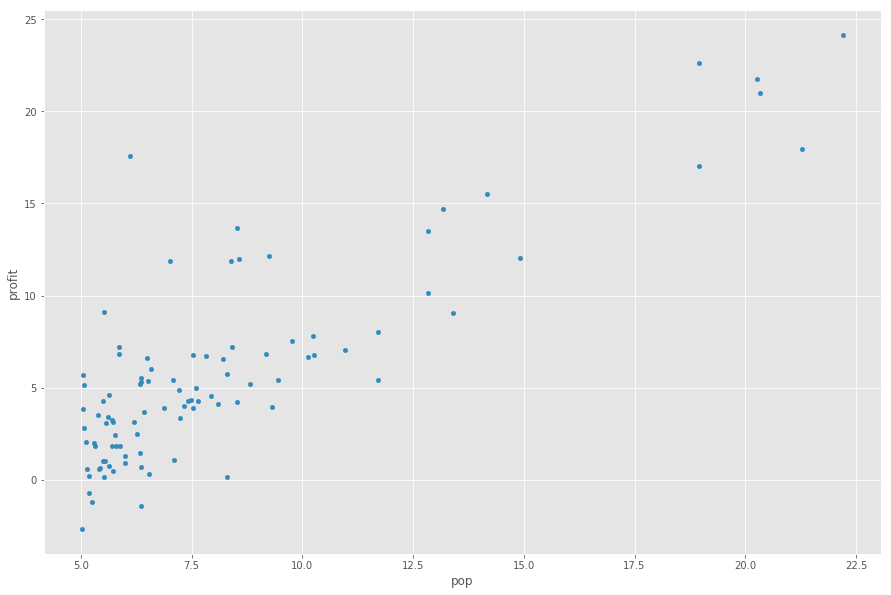

In [6]:
# getting a larger image
# matplotlib.rcParams['figure.figsize'] # Change default plot size
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
df.plot.scatter(x="pop", y="profit")

## using pandas statsmodels

In [7]:
# regression in pandas
# from http://www.learndatasci.com/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
pandas_model = ols("profit ~ pop", data = df).fit()
pandas_model_summary = pandas_model.summary()
print(pandas_model_summary)

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Sun, 21 Jan 2018   Prob (F-statistic):           1.02e-26
Time:                        11:45:27   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8958      0.719     -5.415      0.0

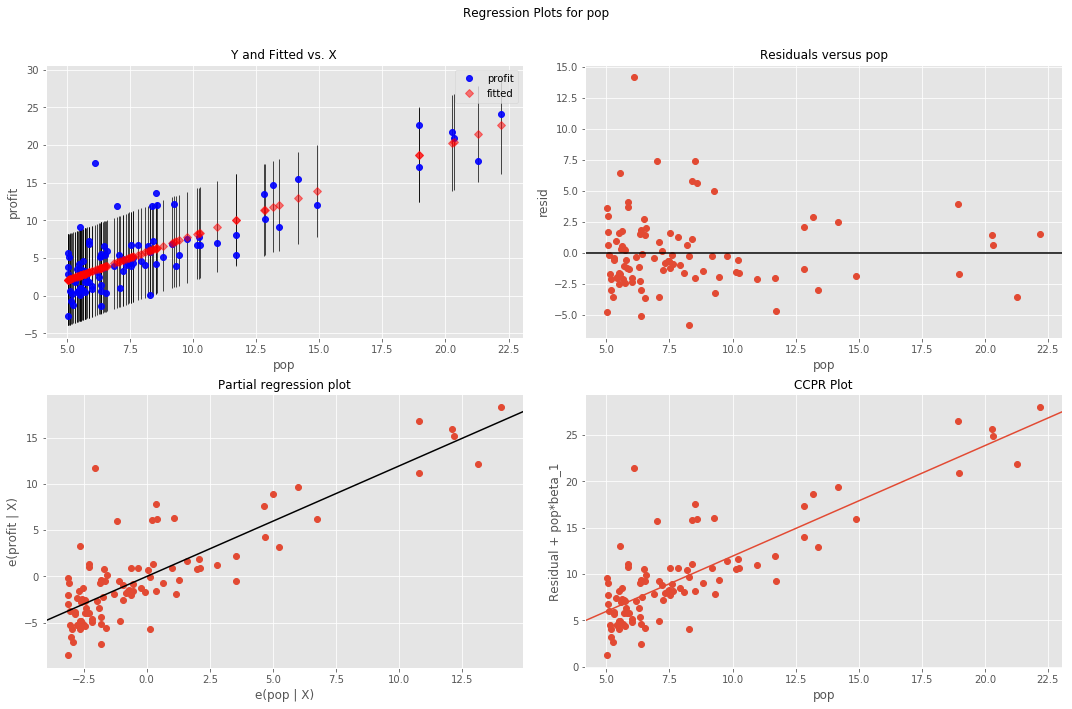

In [8]:

matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
fig1 = sm.graphics.plot_regress_exog(pandas_model, "pop")

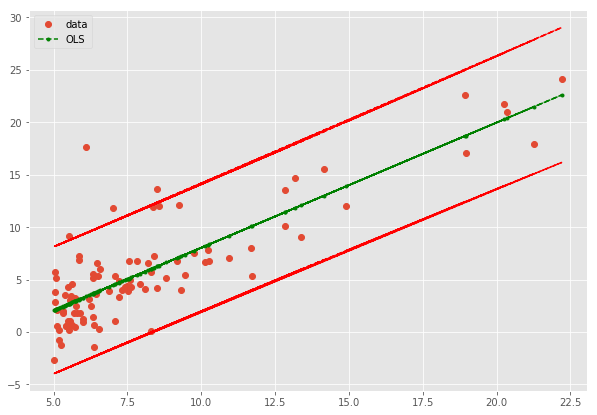

In [9]:
# this produces our trend line

from statsmodels.sandbox.regression.predstd import wls_prediction_std

# predictor variable
x = df[['pop']]
# dependent variable
y = df[['profit']]

# retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(pandas_model)



fig, ax = plt.subplots(figsize=(10,7))
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)


# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, pandas_model.fittedvalues, 'g--.', label="OLS")
# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')
# plot legend
ax.legend(loc='best');

In [10]:
# using numpy polyfit - produces the same parameters as above
np.polyfit(df['pop'], df['profit'],1)


array([ 1.19303364, -3.89578088])

## Using Numpy linear algebra module

In [11]:
# using np.vstack
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.vstack((a,b))

array([[1, 2, 3],
       [2, 3, 4]])

In [12]:
# using np.hstack
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.hstack((a,b))

array([1, 2, 3, 2, 3, 4])

In [13]:
# this is why we use vstack and transpose
a = np.array([[1],[2],[3]])
b = np.array([[2],[3],[4]])
np.hstack((a,b))

array([[1, 2],
       [2, 3],
       [3, 4]])

In [14]:
m = len(df.index)
# extracting values from panda's pop column
x = df['pop'].values

In [15]:
print(type(x))

<class 'numpy.ndarray'>


In [16]:
# extracting values from panda's pop column into an array
x = df['pop'].tolist()
print(type(x))
# print(x)
y = df['profit'].tolist()

<class 'list'>


In [17]:
# generate the design matrix
A = np.vstack([x, np.ones(len(x))]).T


In [18]:
theta1, theta0 = np.linalg.lstsq(A, y)[0]
print(theta1, theta0)

1.19303364419 -3.89578087831


In [19]:
# same, but adding col of ones in the beginning, so thetas show in order
B = np.vstack([np.ones(m), x]).T
theta0, theta1 = np.linalg.lstsq(B, y)[0]
print(theta0, theta1)

-3.89578087831 1.19303364419


## normal equation

In [20]:
theta = np.dot((np.dot(np.linalg.inv(np.dot(B.T,B)),B.T)),y)
theta0 = theta[0]
theta1 = theta[1]
print('Linear regression using normal equation')
print('parameters: theta0=%.2f theta1=%.2f'% (theta0,theta1))

Linear regression using normal equation
parameters: theta0=-3.90 theta1=1.19


## using scikit learn

In [21]:
lm = linear_model.LinearRegression()
lm.fit(B,y)
theta1=lm.coef_[1]
theta0=lm.intercept_

print('Linear regression using sklearn.linear_model.LinearRegression')
print('parameters: a=%.2f b=%.2f'% (theta0, theta1))


Linear regression using sklearn.linear_model.LinearRegression
parameters: a=-3.90 b=1.19


In [22]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [23]:
p = theta0 + theta1*35000
print(p)

41752.2817658


In [24]:
# testing matrix operations for gradient descent

n = 1
x = df['pop'].tolist()
m = len(x)
y = df['profit'].tolist()
X = np.vstack([np.ones(m), x]).T

In [25]:
X.shape

(97, 2)

In [26]:
theta = np.zeros((n+1, 1))
theta.shape

(2, 1)

In [27]:
predictions = np.dot(X, theta)
predictions.shape

(97, 1)

In [28]:
y_vec = np.vstack([y]).T

In [29]:
y_vec.shape

(97, 1)

In [30]:
errors = predictions - y_vec
errors.shape

(97, 1)

In [31]:
sqrErrors = np.power(errors,2)
sqrErrors.shape

(97, 1)

In [32]:
sqrErrors.shape


(97, 1)

In [33]:
J = 1 / (2 * m) * np.sum(sqrErrors)
J

32.072733877455676

In [34]:
theta

array([[ 0.],
       [ 0.]])

In [35]:
type(theta)

numpy.ndarray

In [36]:
for el in theta:
    print(el)

[ 0.]
[ 0.]


In [37]:
theta[0][0] = -1
theta[1][0] = 2

In [38]:
theta

array([[-1.],
       [ 2.]])

In [39]:
# more tests with matrix creation
np.matrix([[1,2],[3,4]])


matrix([[1, 2],
        [3, 4]])

In [40]:
theta_1 = np.matrix([[-1],[2]])
theta_1

matrix([[-1],
        [ 2]])

In [41]:
theta_1.shape

(2, 1)

In [42]:
theta_h = np.matrix([[-1 , 2]])
theta_h.shape

(1, 2)

In [43]:
for el in theta_1:
    print(el)

[[-1]]
[[2]]


In [44]:
for el in theta_h:
    print(el)

[[-1  2]]


In [45]:
M = np.matrix([[8, 1, 6],[3, 5, 7], [4, 9, 2]])
M

matrix([[8, 1, 6],
        [3, 5, 7],
        [4, 9, 2]])

In [46]:
# indexing
U = np.matrix([[8, 1, 6],[3, 5, 7], [4, 9, 2], [11, 10, 12]])
U

matrix([[ 8,  1,  6],
        [ 3,  5,  7],
        [ 4,  9,  2],
        [11, 10, 12]])

In [47]:
U.shape

(4, 3)

In [48]:
# number of rows:
U.shape[0]

4

In [49]:
# number of columns
U.shape[1]

3

In [50]:
Q = np.matrix([[8, 1, 6],[3, 5, 7], [4, 9, 2], [11, 10, 12], [13, 14, 15]])
Q

matrix([[ 8,  1,  6],
        [ 3,  5,  7],
        [ 4,  9,  2],
        [11, 10, 12],
        [13, 14, 15]])

In [51]:
rows = Q.shape[0]
cols = Q.shape[1]

for i in range(len(Q)):
    for j in range(len(Q[i])):
        print(Q[i][j])
        

[[8 1 6]]
[[3 5 7]]
[[4 9 2]]
[[11 10 12]]
[[13 14 15]]


In [68]:
len(Q)

5

In [71]:
print (Q[2][0])


[[4 9 2]]


In [54]:
# to visit every element of an array
for x in np.nditer(Q):
    print(x)

8
1
6
3
5
7
4
9
2
11
10
12
13
14
15


In [55]:
a = np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [56]:
#  the order is chosen to match the memory layout of the array instead of using a standard C or Fortran ordering.
for x in np.nditer(a):
    print(x)

0
1
2
3
4
5


In [57]:
# customizing the order BY COLUMN - F = FORTRAN
for x in np.nditer(a, order='F'):
    print(x)

0
3
1
4
2
5


In [58]:
Q

matrix([[ 8,  1,  6],
        [ 3,  5,  7],
        [ 4,  9,  2],
        [11, 10, 12],
        [13, 14, 15]])

## uploading data for part 2 - linear regression with multiple variables

In [59]:
df2 = pd.read_csv('ex1/ex1data2.txt', names = ["size", "beds", "price"])
print(df2.shape)

(47, 3)


In [60]:
df2.describe()

,size,beds,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


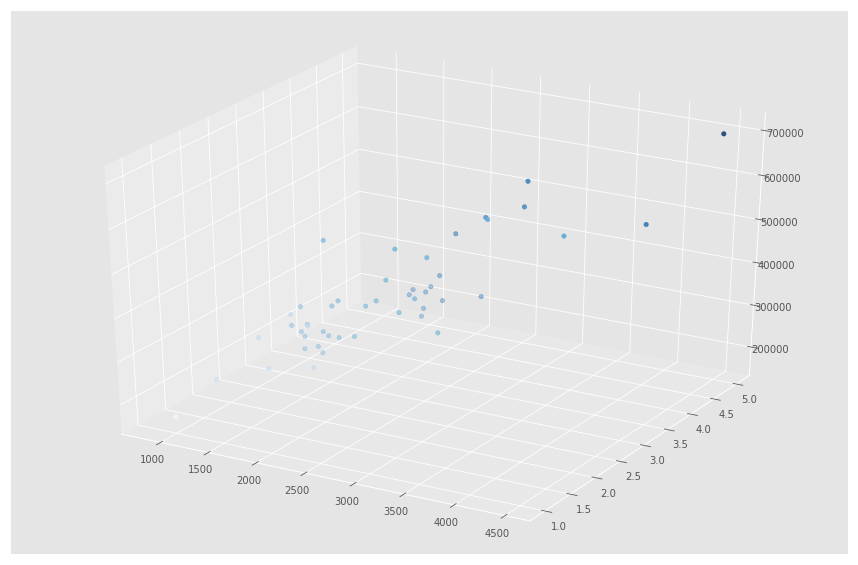

In [61]:
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
fig2 = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
# zline = np.linspace(169000, 700000)
# xline = np.linspace(850, 4500)
# yline = np.linspace(0,6)
# ax.plot3D(xline, yline, zline, 'gray')

z = df2['price'].tolist()
x = df2['size'].tolist()
y = df2['beds'].tolist()
ax.scatter3D(x, y, z, c=y, cmap='Blues')


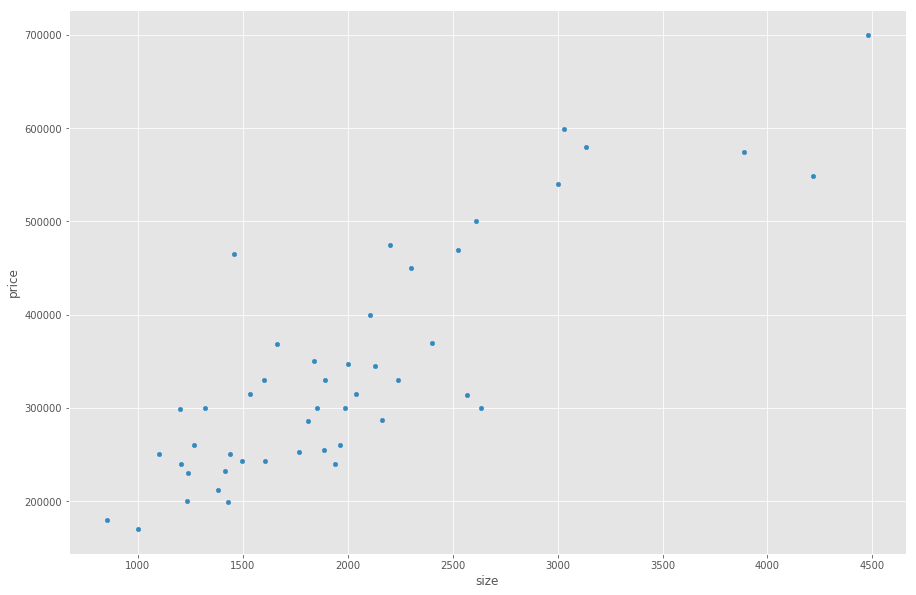

In [62]:
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
df2.plot.scatter(x="size", y="price")

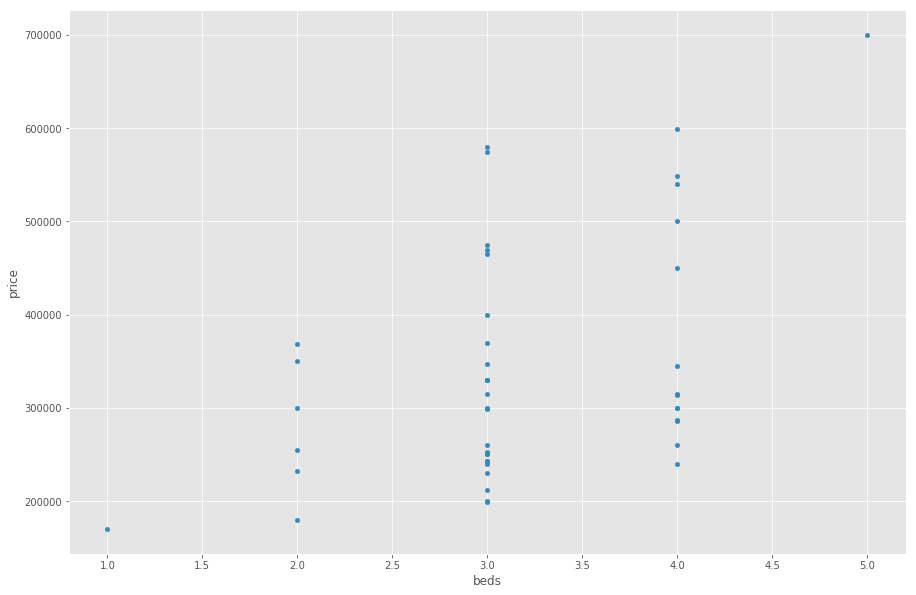

In [63]:
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
df2.plot.scatter(x="beds", y="price")

In [64]:
dfArray = df2.values

In [65]:
dfArray[0]

array([  2104,      3, 399900])